<a href="https://colab.research.google.com/github/ranton256/stats_notebooks/blob/main/correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pearson Correlation

Correlation is a relationship between two sets of data or random variables, https://en.wikipedia.org/wiki/Correlation

Pearson correlation is one of (and the most common) measure of correlation between two variables, https://en.wikipedia.org/wiki/Pearson_correlation_coefficient .

The Pearson correlation coefficient measures **linear correlation** between two sets of data. It is the ratio between the [covariance](https://en.wikipedia.org/wiki/Covariance) of two variables and the product of their [standard deviations](https://en.wikipedia.org/wiki/Standard_deviation). It has a value from -1 to 1 where 1 would indicate perfect correlation, and -1 would indicate perfect negative correlation.

<https://onlinestatbook.com/2/describing_bivariate_data/pearson.html>



## With SciPy

Let's use SciPy's implementation of Pearson's Correlation Coefficient, also known as 'r'

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

https://realpython.com/numpy-scipy-pandas-correlation-python/

In [ ]:
# load the Iris dataset using sklearn

from sklearn import datasets

iris = datasets.load_iris(as_frame=True)



In [ ]:
# describe the datasets.

iris.frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


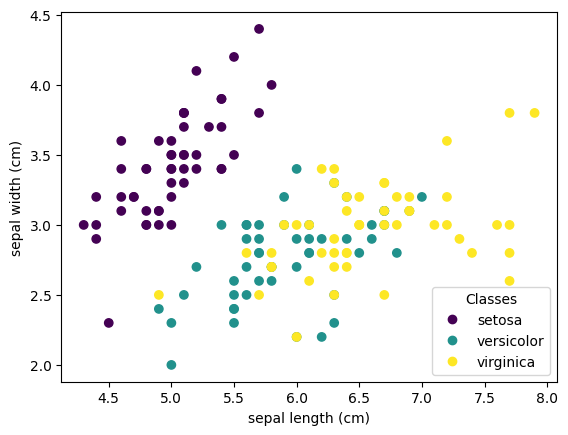

In [ ]:
# show scatter plots of the dataset

import matplotlib.pyplot as plt

_, ax = plt.subplots()
x = iris.frame["sepal length (cm)"]
y = iris.frame["sepal width (cm)"]
scatter = ax.scatter(x, y, c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)


In [ ]:
# let's calculate the correlation coefficients of sepal width to sepal length.

from scipy.stats import pearsonr

df = iris.frame

r, p = pearsonr(df["sepal length (cm)"], df["sepal width (cm)"])
print(f"r = {r}, p = {p}")

r = -0.11756978413300206, p = 0.15189826071144746


In [ ]:
import numpy as np

r, p = pearsonr(x, y)
print(f"r = {r}, p = {p}")
cc = np.corrcoef(x, y)
cc

r = -0.11756978413300206, p = 0.15189826071144746


array([[ 1.        , -0.11756978],
       [-0.11756978,  1.        ]])

In [ ]:
x2 = x.to_numpy()
y2 = y.to_numpy()
r, p = pearsonr(x2, y2)
print(f"r = {r}, p = {p}")
cc = np.corrcoef(x2, y2)
cc

r = -0.11756978413300206, p = 0.15189826071144746


array([[ 1.        , -0.11756978],
       [-0.11756978,  1.        ]])

In [ ]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
  [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])
np.corrcoef(xyz)
# array([[ 1.        ,  0.75864029, -0.96807242],
#        [ 0.75864029,  1.        , -0.83407922],
#        [-0.96807242, -0.83407922,  1.        ]])


array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

In [ ]:
import scipy

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

In [ ]:
 line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
 line

'Regression line: y=3.42+-0.06x, r=-0.12'

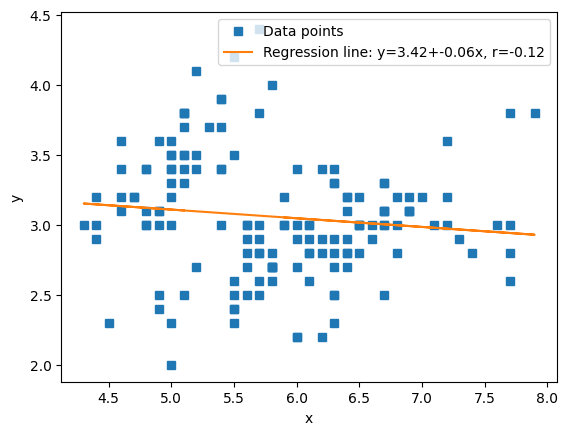

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()
